# San Francisco Crime Visualization

In the notebook, we analyze criminal incident data from San Francisco, using real data from the Summer 2014.

We will answer the following questions :
- What are the most common incidents in San Francisco during the Summer 2014 ?
- When are they more likely to happen during the day?
- In which district are they most likely to happen?

We show that :
- The most common incident is "LARCENY/THEFT"
- "LARCENY/THEFT" is most likely to occur in CENTRAL, NORTHERN,and SOUTHERN districts
- "LARCENY/THEFT" is more frequent to occur during the evening and during August
- "LARCENY/THEFT" could be more frequent in the tourist areas

In [8]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

%matplotlib inline

plt.rcParams["figure.figsize"] = [16,8]

In [9]:
# load the data from CSV file
data = pd.read_csv('sanfrancisco_incidents_summer_2014.csv',parse_dates='Date')

# Extract the list of districts, categories of crime and days of the week
categories = sorted(data['Category'].unique().tolist())
districts = sorted(data['PdDistrict'].unique().tolist())
day_of_week = sorted(data['DayOfWeek'].unique().tolist())
data['hour'] = data['Time'].apply(lambda x: int(x.split(":")[0]))

### Most common incidents

As a start, we find the 10 most common incidents that happen during the Summer 2014 and plot the number of occurences

In [10]:
# get the name of the 10 most common crimes
most_common_cat = data['Category'].value_counts()[0:9].index.tolist()

# extract the most common crimes from the database
most_commons = data[data['Category'].apply(lambda x: x in most_common_cat)]

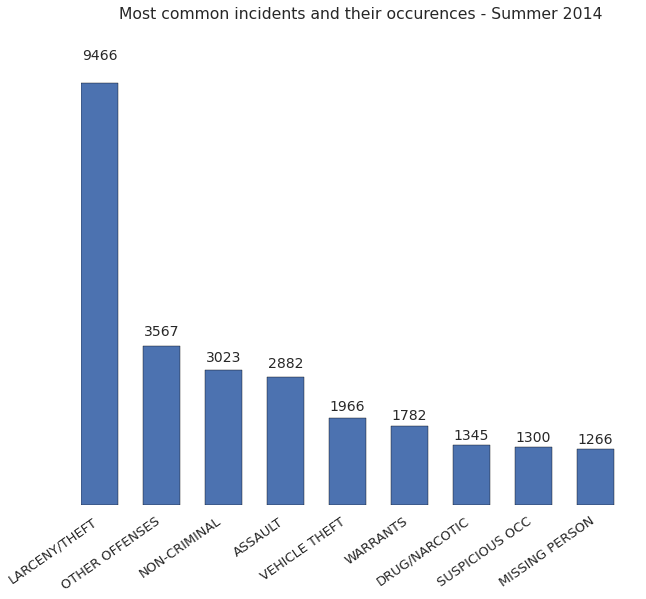

In [13]:
labels = most_commons['Category'].value_counts().index.tolist()
Y =  most_commons['Category'].value_counts().tolist()

# define a bar plot
sns.set(style="white",context="talk")
fig,ax = plt.subplots(figsize=(10,8))

width = 0.6 # width of the bars
ind = np.arange(len(labels))

rect = ax.bar(ind,Y,width)

# function to draw the label
def autolabel(rects):
    # attach some text labels
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.05*height,
                '%d' % int(height),
                ha='center', va='bottom',fontsize=14)

autolabel(rect)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
plt.xticks(ind+width/2,labels,rotation=35,ha='right')
ax.yaxis.set_visible(False)
plt.title('Most common incidents and their occurences - Summer 2014',y=1.08)
plt.show()

As we can see on the plot above, "LARCENY/THEFT" was the most common incident during the summer 2014, with 9466 incidents. Then we have "other offenses", that group all kind of incidents, and "non criminal". "Assault" and "Vehicle theft" come next, and are therefore the most common crimes after "larceny/theft".

## Analyze the incident category per district

Now, let's have a look to where the different incidents happen mostly.


In [15]:
# Build a cross table in order to get the number of each type 
# of incident per district
cat_per_district = pd.crosstab(data['PdDistrict'],data['Category'],) 

# cross table for the most common crimes
cat_per_district_common = pd.crosstab(most_commons['Category'],data['PdDistrict']) 

Build a heat map in order to visualize what kind of crime occurs in each district

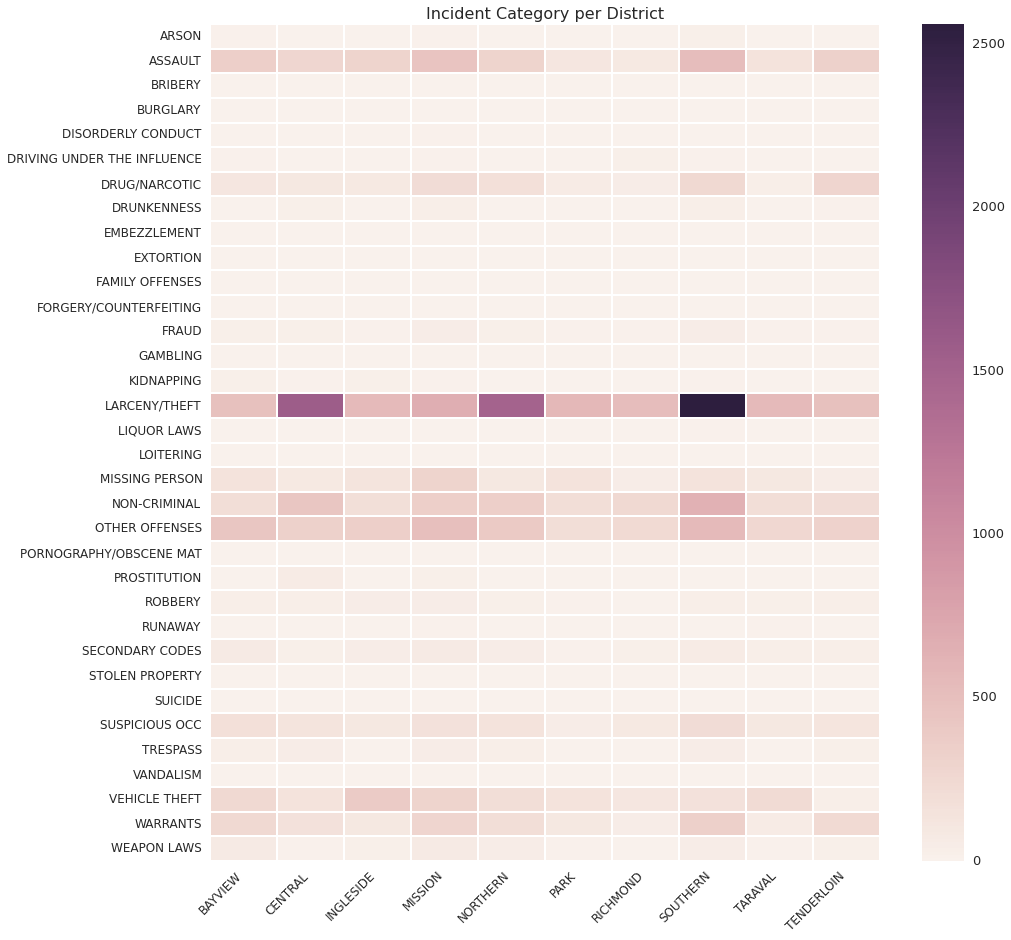

In [21]:
# transform it into a heat map
fig = plt.figure(figsize=(15,15))
ax = sns.heatmap(pd.crosstab(data['Category'],data['PdDistrict']),linewidths=.5)
plt.title('Incident Category per District',fontsize=16)
plt.legend(fontsize=14)
plt.xticks(fontsize=12,rotation=45,ha='right')
plt.yticks(fontsize=12)
plt.xlabel("")
plt.ylabel("")
plt.savefig('crime_per_district.png')

On the plot above,we can see the number of incidents, per category and per district. The darker, the highest number.

We can see that LARCENY/THEFT occurs in all districts, but mostly in three of them : CENTRAL, NORTHERN, SOUTHERN.

For reference, below is a map of the police district in San Francisco.

In [41]:
%%html
<img src="http://www.sfdistrictattorney.org/modules/showimage.aspx?imageid=85"/>

## Incident category versus time of the day

Let's have a look to the impact of the time on the number of incident, for the 10 most commons incident

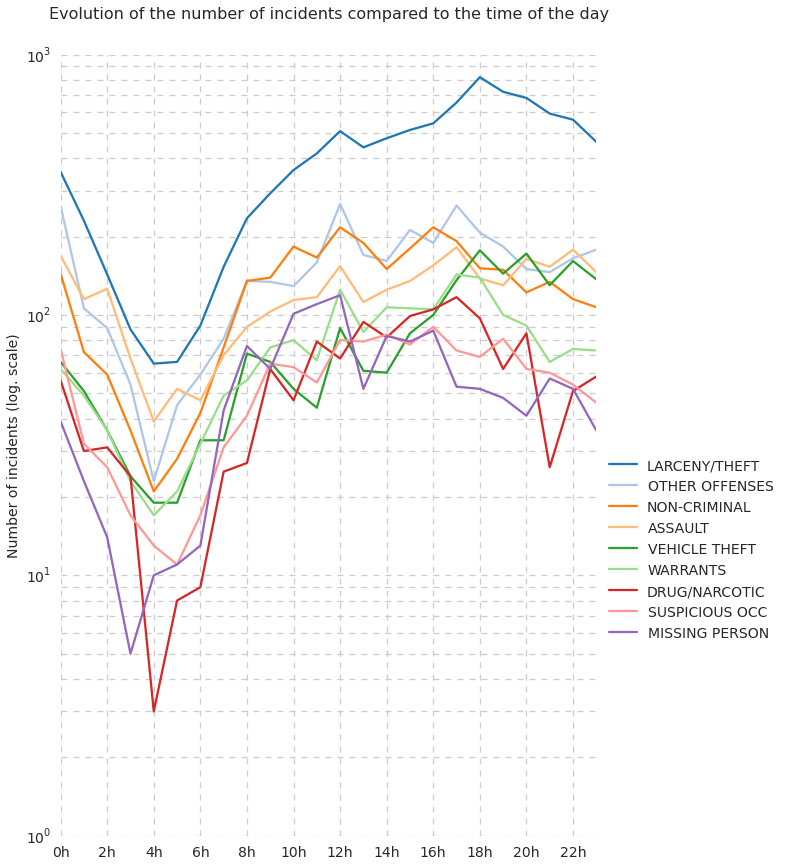

In [23]:
fig,ax = plt.subplots(figsize=(12,14))

# define the plot colors
color_dict = {'ASSAULT': '#ffbb78',
             'DRUG/NARCOTIC': '#d62728',
             'LARCENY/THEFT': '#1f77b4',
             'MISSING PERSON': '#9467bd',
             'NON-CRIMINAL': '#ff7f0e',
             'OTHER OFFENSES': '#aec7e8',
             'SUSPICIOUS OCC': '#ff9896',
             'VEHICLE THEFT': '#2ca02c',
             'WARRANTS': '#98df8a'}

# plot the data
for cat in most_common_cat:
    data[data['Category']==cat].groupby('hour')['hour'].count().plot(label=cat,color=color_dict[cat])

# Shrink current axis by 20% and add the legend
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center top', bbox_to_anchor=(1, 0.5),fontsize=14)

# remove the plot frame lines
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)

# Ensure that the axis ticks only show up on the bottom and left of the plot.
# Ticks on the right and top of the plot are generally unnecessary.
ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left()

plt.xticks(np.arange(0,24,2),fontsize=14)
ax.xaxis.set_major_formatter(matplotlib.ticker.FormatStrFormatter("%dh"))
plt.xlabel('')

plt.ylabel('Number of incidents (log. scale)',fontsize=14)
plt.yticks(np.arange(0,900,100),fontsize=14)
ax.set_yscale('log')

plt.title('Evolution of the number of incidents compared to the time of the day',fontsize=16,y=1.04)
plt.grid(b=True, which='major', linestyle='--')
plt.grid(b=True, which='minor', linestyle='--')

As we can wee on the previous plot, the number of "LARCENY/THEFT" incident peaks at 6 pm (18:00) on average. Similarly, other incidents such as ASSAULT, VEHICLE THEFT or DRUG/NARCOTIC increase when it's dark

## Incident category over the summer

For ease of readiness, we will now consider 'ASSAULT','LARCENY/THEFT','VEHICLE THEFT', and 'DRUG/NARCOTIC' only, and look at how the number of incidents change over the summer

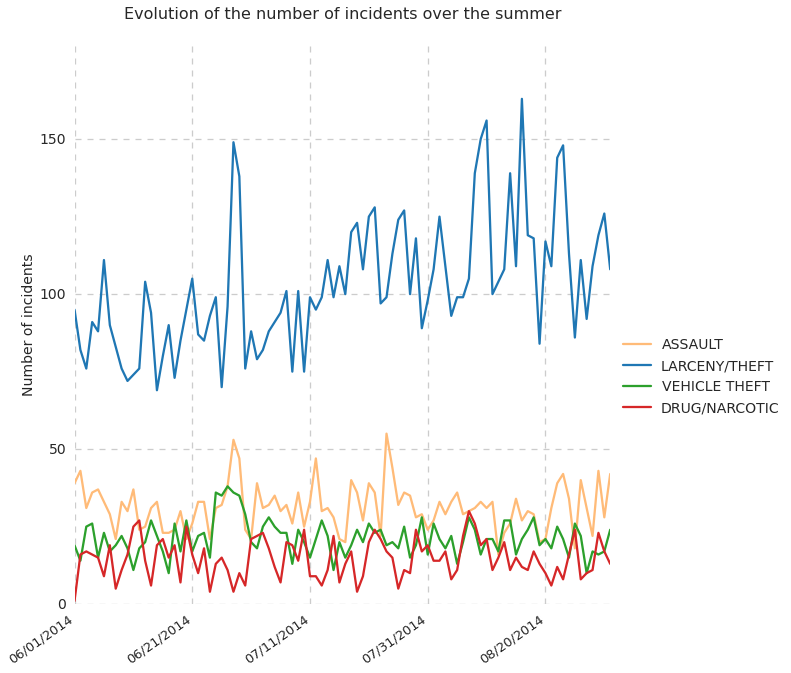

In [24]:
fig,ax = plt.subplots(figsize=(12,10))

# plot the data
for cat in ['ASSAULT','LARCENY/THEFT','VEHICLE THEFT','DRUG/NARCOTIC']:
    crimes = data[data['Category']==cat]
    crimes.groupby('Date')['Date'].count().plot(label=cat,color=color_dict[cat])

# Shrink current axis by 20% and add the legend
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center top', bbox_to_anchor=(1, 0.5),fontsize=14)

# remove the plot frame lines
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)

# Ensure that the axis ticks only show up on the bottom and left of the plot.
# Ticks on the right and top of the plot are generally unnecessary.
ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left()

plt.xlabel('')
plt.xticks(rotation=35,ha='right')

plt.ylabel('Number of incidents',fontsize=14)
plt.yticks(np.arange(0,200,50),fontsize=14)

plt.title('Evolution of the number of incidents over the summer',fontsize=16,y=1.04)
plt.grid(b=True, which='major', linestyle='--')
plt.grid(b=True, which='minor', linestyle='--')

As we can see, the number of LARCENY/THEFT increases on average during the month of August. This is probably due to an increase in pickpocketting due to many tourists visiting San Francisco. The other three crimes does not vary significantly over the summer

## Build a map of LARCENY/THEFT


Now we can use the GPS data in order to see, within each district, where happened LARCENY/THEFT incidents during August 2014.

I used the data provided at the following address in order to draw the limit of each police district :
https://catalog.data.gov/dataset/sfpd-districts-zipped-shapefile-format-350b4

Then I converted it into a "geojson" file, and used Folium to plot everything on an OpenStreetMap.

In [26]:
import folium
from IPython.display import HTML

# This function allows to display the map directly in a notebook
def display(m, height=500):
    """Takes a folium instance and embed HTML."""
    m._build_map()
    srcdoc = m.HTML.replace('"', '&quot;')
    embed = HTML('<iframe srcdoc="{0}" '
                 'style="width: 100%; height: {1}px; '
                 'border: none"></iframe>'.format(srcdoc, height))
    return embed

data['Date'].value_counts()

thefts = data[data['Category']=='LARCENY/THEFT']
august_thefts = thefts[thefts['Date'].apply(lambda x:x.split('/')[0]=='08')]
worst_date = august_thefts['Date'].value_counts().index[0]
plot_data = august_thefts #thefts[thefts['Date']==worst_date]

In [38]:
# Center the map on San Francisco
SF_COORDINATES = (37.78, -122.41)  
map = folium.Map(location=SF_COORDINATES,zoom_start=13)

# add a marker for every record in the most common crimes data
col = color_dict['LARCENY/THEFT']
for id, each in enumerate(plot_data.iterrows()):
    map.circle_marker(radius=30,location = [each[1]['Y'],each[1]['X']],fill_color=col,line_color=col)

map.geo_json(geo_path='districts.geojson',line_color='#FF0000',fill_opacity=0.1)
    
display(map)


As we can see, there is a high density of incidents along Market Street, between the Civic Center and the Financial District. This is also a very popular area of San Francisco for shopping and tourism. There is also more incidents in the north of the NORTHERN district, where is located the very touristy "Fisherman's Wharf". This may show a correlation between the amount of tourists and the amount of "thefts", which would be logical.